# Вебинар 4. Обучение с учителем.

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train.flatten(), y=true_values_train.flatten())
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test.flatten(), y=true_values_test.flatten())
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

**Пути к директориям и файлам**

In [4]:
PREPARED_DATASET_PATH = '../data/housing_prepared.csv'
TRAIN_DATASET_PATH = '../data/housing_train.csv'
SCALER_FILE_PATH = 'scaler.pkl'
MODEL_FILE_PATH = 'model.pkl' 

### Загрузка данных

**Описание датасета**

Статистические данные о группах домов в Калифорнии, основанные на переписи 1990 года.   

A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

* **longitude** - долгота группы
* **latitude** - широта группы
* **housing_median_age** - средний возраст дома в группе (Median age of a house within a block)
* **total_rooms** - общее количество комнат в группе домов (Total number of rooms within a block)
* **total_bedrooms** - общее количество спален в группе домов (Total number of bedrooms within a block)
* **population** - количество проживающих в группе домов (Total number of people residing within a block)
* **households** - количество семей (Total number of households, a group of people residing within a home unit, for a block)
* **ocean_proximity** - близость океана
* **median_income** - средний доход семьи (Median income for households within a block of houses, measured in tens of thousands of US Dollars)
* **median_house_value** - средняя стоимость дома (Median house value for households within a block, measured in US Dollars)

In [5]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_household,persons_per_household,income_per_person
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY,0,0,1,0,6.984,1.024,2.556,258.547
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY,0,0,1,0,6.238,0.972,2.110,34.575
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY,0,0,1,0,8.288,1.073,2.802,146.319
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY,0,0,1,0,5.817,1.073,2.548,101.131
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY,0,0,1,0,6.282,1.081,2.181,68.074


In [6]:
df.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
<1H OCEAN                 0
INLAND                    0
NEAR BAY                  0
NEAR OCEAN                0
rooms_per_household       0
bedrooms_per_household    0
persons_per_household     0
income_per_person         0
dtype: int64

### Отбор признаков

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20635 entries, 0 to 20634
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               20635 non-null  float64
 1   latitude                20635 non-null  float64
 2   housing_median_age      20635 non-null  float64
 3   total_rooms             20635 non-null  float64
 4   total_bedrooms          20635 non-null  float64
 5   population              20635 non-null  float64
 6   households              20635 non-null  float64
 7   median_income           20635 non-null  float64
 8   median_house_value      20635 non-null  float64
 9   ocean_proximity         20635 non-null  object 
 10  <1H OCEAN               20635 non-null  int64  
 11  INLAND                  20635 non-null  int64  
 12  NEAR BAY                20635 non-null  int64  
 13  NEAR OCEAN              20635 non-null  int64  
 14  rooms_per_household     20635 non-null

In [8]:
feature_names = [col for col in df.columns if col not in ['median_house_value', 'ocean_proximity']]

target_name = ['median_house_value']

In [9]:
df[feature_names].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_household,persons_per_household,income_per_person
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,0,0,1,0,6.984,1.024,2.556,258.547
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,0,0,1,0,6.238,0.972,2.110,34.575
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,0,0,1,0,8.288,1.073,2.802,146.319
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,0,0,1,0,5.817,1.073,2.548,101.131
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,0,0,1,0,6.282,1.081,2.181,68.074


### Разбиение на train и test

In [10]:
X = df[feature_names]
y = df[target_name].values

![](train_test.jpg)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15476, 16) (15476, 1)
(5159, 16) (5159, 1)


In [12]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_household,persons_per_household,income_per_person
19192,-122.700,38.440,45.000,883.000,202.000,401.000,194.000,3.284,1,0,0,0,4.552,1.041,2.067,81.908
3746,-118.410,34.160,32.000,3060.000,505.000,1159.000,510.000,6.370,1,0,0,0,6.000,0.990,2.273,54.964
20539,-121.760,38.550,23.000,8800.000,1857.000,6330.000,1832.000,2.065,0,1,0,0,4.803,1.014,3.455,3.262
14303,-117.140,32.710,52.000,979.000,314.000,975.000,297.000,1.238,0,0,0,1,3.296,1.057,3.283,12.692
18300,-122.120,37.410,33.000,2892.000,617.000,1250.000,581.000,5.373,0,0,1,0,4.978,1.062,2.151,42.982


### Log-трансформация и стандартизация признаков

Подготовка данных к линейной регрессии

**Логарифмирование признаков с асимметричным распределением**

In [13]:
feature_skewed_names = ['households','median_income','population', 'total_bedrooms', 
                        'total_rooms', 'rooms_per_household', 'bedrooms_per_household', 
                        'persons_per_household', 'income_per_person']
feature_log_names = []
for f in feature_skewed_names:
    X_train[f + '_log'] = np.log(X_train[f])
    X_test[f + '_log'] = np.log(X_test[f])
    feature_log_names.append(f + '_log')

In [14]:
X_train[feature_log_names].head()

,households_log,median_income_log,population_log,total_bedrooms_log,total_rooms_log,rooms_per_household_log,bedrooms_per_household_log,persons_per_household_log,income_per_person_log
19192,5.268,1.189,5.994,5.308,6.783,1.515,0.040,0.726,4.406
3746,6.234,1.852,7.055,6.225,8.026,1.792,-0.010,0.821,4.007
20539,7.513,0.725,8.753,7.527,9.083,1.569,0.014,1.240,1.182
14303,5.694,0.213,6.882,5.749,6.887,1.193,0.056,1.189,2.541
18300,6.365,1.681,7.131,6.425,7.970,1.605,0.060,0.766,3.761


In [15]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,15476.000,-119.578,2.006,-124.350,-121.810,-118.500,-118.010,-114.470
latitude,15476.000,35.641,2.136,32.540,33.940,34.260,37.720,41.950
housing_median_age,15476.000,28.664,12.354,1.000,19.000,29.000,37.000,52.000
total_rooms,15476.000,2645.070,2170.491,2.000,1454.000,2138.500,3166.000,37937.000
total_bedrooms,15476.000,538.655,419.012,2.000,297.000,435.000,647.000,6445.000
population,15476.000,1423.775,1137.877,3.000,796.000,1165.000,1702.000,35682.000
households,15476.000,501.024,382.189,2.000,279.750,411.000,607.000,6082.000
median_income,15476.000,3.882,1.911,0.500,2.568,3.539,4.762,15.000
<1H OCEAN,15476.000,0.444,0.497,0.000,0.000,0.000,1.000,1.000
INLAND,15476.000,0.317,0.465,0.000,0.000,0.000,1.000,1.000


**Стандартизация признаков**

$$z_i=\frac{x_i-\mu}{\sigma}$$
Среднее значение:
$$\mu=\frac{1}{n}\sum_{i=1}^n{x_i}$$
Стандартное отклонение:
$$\sigma=\sqrt{\frac{1}{n}\sum_{i=1}^n{(x_i-\mu)^2}}$$

In [16]:
# отберем признаки для стандартизации
feature_num_names = X_train.select_dtypes(include='float64').columns.tolist()
feature_num_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'persons_per_household',
 'income_per_person',
 'households_log',
 'median_income_log',
 'population_log',
 'total_bedrooms_log',
 'total_rooms_log',
 'rooms_per_household_log',
 'bedrooms_per_household_log',
 'persons_per_household_log',
 'income_per_person_log']

In [17]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[feature_num_names]),
                              columns=feature_num_names, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[feature_num_names]),
                             columns=feature_num_names, index=X_test.index)

In [18]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,15476.000,0.000,1.000,-2.379,-1.113,0.538,0.782,2.547
latitude,15476.000,0.000,1.000,-1.452,-0.796,-0.646,0.973,2.954
housing_median_age,15476.000,0.000,1.000,-2.239,-0.782,0.027,0.675,1.889
total_rooms,15476.000,0.000,1.000,-1.218,-0.549,-0.233,0.240,16.260
total_bedrooms,15476.000,-0.000,1.000,-1.281,-0.577,-0.247,0.259,14.096
population,15476.000,-0.000,1.000,-1.249,-0.552,-0.227,0.245,30.108
households,15476.000,-0.000,1.000,-1.306,-0.579,-0.236,0.277,14.603
median_income,15476.000,0.000,1.000,-1.770,-0.688,-0.180,0.460,5.818
rooms_per_household,15476.000,-0.000,1.000,-1.856,-0.403,-0.083,0.256,55.609
bedrooms_per_household,15476.000,0.000,1.000,-1.789,-0.205,-0.110,0.001,53.750


In [19]:
feature_bin_names = X_train[feature_names].select_dtypes(include='int64').columns.tolist()
feature_bin_names

['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']

In [20]:
feature_origin_names = list(set(feature_names) - set(feature_bin_names))
feature_origin_names

['rooms_per_household',
 'persons_per_household',
 'housing_median_age',
 'bedrooms_per_household',
 'total_bedrooms',
 'longitude',
 'median_income',
 'households',
 'total_rooms',
 'latitude',
 'population',
 'income_per_person']

### Сохранение обучающего датасета

In [21]:
pd.concat([X_train_scaled, 
          X_train[feature_names + feature_log_names]], 
          axis=1, ignore_index = True).to_csv(TRAIN_DATASET_PATH, index=False, encoding='utf-8')

### Построение базовых моделей и выбор лучшей

**Linear Regression - Линейная регрессия**

![](fig-lin-reg.jpg)

**Метрики качества маделей для задач регрессии**  

* Средняя абсолютная ошибка (Mean Absolute Error, MAE): `mean_absolute_error(y_true, y_pred)`

$$ \text{MAE} = \frac{1}{n}\sum_{i=1}^n{|y_i-f(x_i)|}$$

где $f(x_i)=b_0+b_1x_{i}^1+b_2x_{i}^2+\dots+b_nx_{i}^p$

* Среднеквадратическая ошибка (Mean Squared Error, MSE): `mean_squared_error(y_true, y_pred)`

$$\text{MSE}=\frac{1}{n}\sum_{i=1}^n{(y_i-f(x_i))^2}$$

* Коэффициент детерминации ($\text{R}^2$): `r2_score(y_true, y_pred)`

$$\text{R}^2=1-\frac{\sum_{i=1}^n{(y_i-f(x_i))^2}}{\sum_{i=1}^n{(y_i-\overline{y})^2}}$$



In [22]:
X_train[feature_names].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_household,persons_per_household,income_per_person
19192,-122.700,38.440,45.000,883.000,202.000,401.000,194.000,3.284,1,0,0,0,4.552,1.041,2.067,81.908
3746,-118.410,34.160,32.000,3060.000,505.000,1159.000,510.000,6.370,1,0,0,0,6.000,0.990,2.273,54.964
20539,-121.760,38.550,23.000,8800.000,1857.000,6330.000,1832.000,2.065,0,1,0,0,4.803,1.014,3.455,3.262
14303,-117.140,32.710,52.000,979.000,314.000,975.000,297.000,1.238,0,0,0,1,3.296,1.057,3.283,12.692
18300,-122.120,37.410,33.000,2892.000,617.000,1250.000,581.000,5.373,0,0,1,0,4.978,1.062,2.151,42.982


In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train[feature_names], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train:	R2 = 0.647	MAE = 49962.246
Test:	R2 = 0.617	MAE = 50101.992


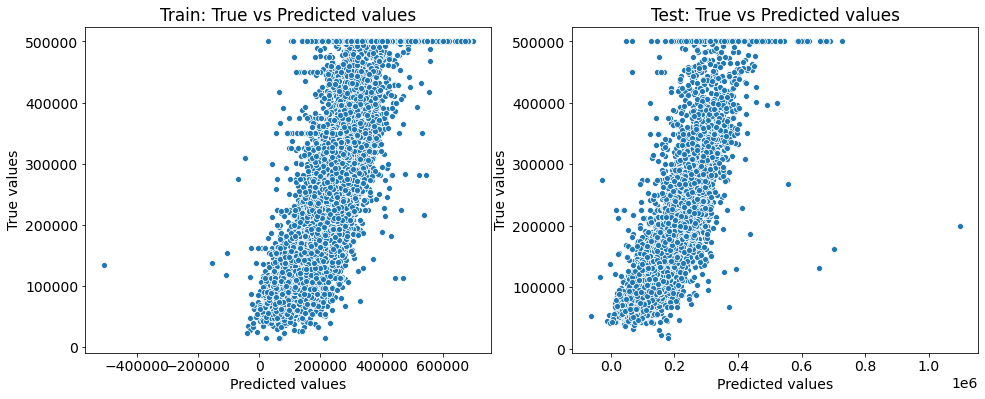

In [24]:
y_train_preds = lr_model.predict(X_train[feature_names])
y_test_preds = lr_model.predict(X_test[feature_names])

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [25]:
pd.DataFrame({"Feature":feature_names,"Coefficients":lr_model.coef_.flatten().T})

,Feature,Coefficients
0,longitude,-26883.538
1,latitude,-25607.071
2,housing_median_age,1076.393
3,total_rooms,-5.423
4,total_bedrooms,50.163
5,population,-32.177
6,households,82.546
7,median_income,40789.278
8,<1H OCEAN,-151150.009
9,INLAND,-189207.889


In [26]:
X_train = pd.concat([X_train_scaled[feature_origin_names], 
                     X_train[feature_bin_names]], axis=1)
X_test = pd.concat([X_test_scaled[feature_origin_names], 
                    X_test[feature_bin_names]], axis=1)

X_train.head()

,rooms_per_household,persons_per_household,housing_median_age,bedrooms_per_household,total_bedrooms,longitude,median_income,households,total_rooms,latitude,population,income_per_person,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
19192,-0.363,-0.090,1.322,-0.128,-0.803,-1.557,-0.313,-0.803,-0.812,1.311,-0.899,0.219,1,0,0,0
3746,0.227,-0.072,0.270,-0.240,-0.080,0.582,1.302,0.023,0.191,-0.693,-0.233,0.027,1,0,0,0
20539,-0.261,0.026,-0.459,-0.188,3.146,-1.088,-0.951,3.483,2.836,1.362,4.312,-0.342,0,1,0,0
14303,-0.875,0.012,1.889,-0.093,-0.536,1.216,-1.384,-0.534,-0.768,-1.372,-0.394,-0.275,0,0,0,1
18300,-0.190,-0.083,0.351,-0.082,0.187,-1.267,0.780,0.209,0.114,0.828,-0.153,-0.058,0,0,1,0


Train:	R2 = 0.647	MAE = 49962.246
Test:	R2 = 0.617	MAE = 50101.992


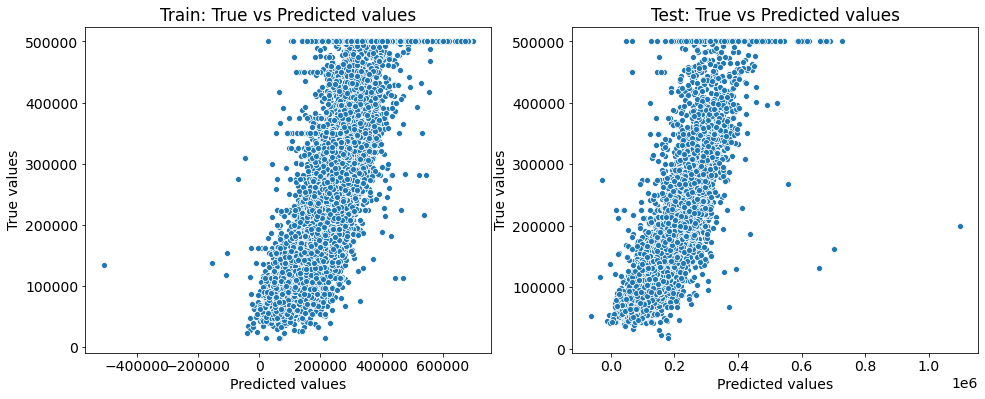

In [27]:
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
y_test_preds = lr_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [28]:
pd.DataFrame({"Feature":X_train.columns,"Coefficients":lr_model.coef_.flatten().T})\
        .sort_values('Coefficients')

,Feature,Coefficients
13,INLAND,-189207.889
14,NEAR BAY,-154378.913
12,<1H OCEAN,-151150.009
15,NEAR OCEAN,-146101.844
9,latitude,-54698.755
5,longitude,-53915.319
10,population,-36612.109
8,total_rooms,-11770.085
0,rooms_per_household,-5902.699
11,income_per_person,-2419.622


In [29]:
X_train = pd.concat([X_train_scaled, 
                     X_train[feature_bin_names]], axis=1)
X_test = pd.concat([X_test_scaled, 
                    X_test[feature_bin_names]], axis=1)

X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,...,total_bedrooms_log,total_rooms_log,rooms_per_household_log,bedrooms_per_household_log,persons_per_household_log,income_per_person_log,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
19192,-1.557,1.311,1.322,-0.812,-0.803,-0.899,-0.803,-0.313,-0.363,-0.128,...,-1.028,-1.139,-0.488,-0.175,-1.073,1.148,1,0,0,0
3746,0.582,-0.693,0.270,0.191,-0.080,-0.233,0.023,1.302,0.227,-0.240,...,0.234,0.525,0.514,-0.462,-0.752,0.679,1,0,0,0
20539,-1.088,1.362,-0.459,2.836,3.146,4.312,3.483,-0.951,-0.261,-0.188,...,2.027,1.939,-0.293,-0.328,0.665,-2.645,0,1,0,0
14303,1.216,-1.372,1.889,-0.768,-0.536,-0.394,-0.534,-1.384,-0.875,-0.093,...,-0.421,-1.001,-1.659,-0.087,0.492,-1.046,0,0,0,1
18300,-1.267,0.828,0.351,0.114,0.187,-0.153,0.209,0.780,-0.190,-0.082,...,0.509,0.449,-0.164,-0.062,-0.937,0.389,0,0,1,0


Train:	R2 = 0.669	MAE = 48253.441
Test:	R2 = 0.63	MAE = 49002.498


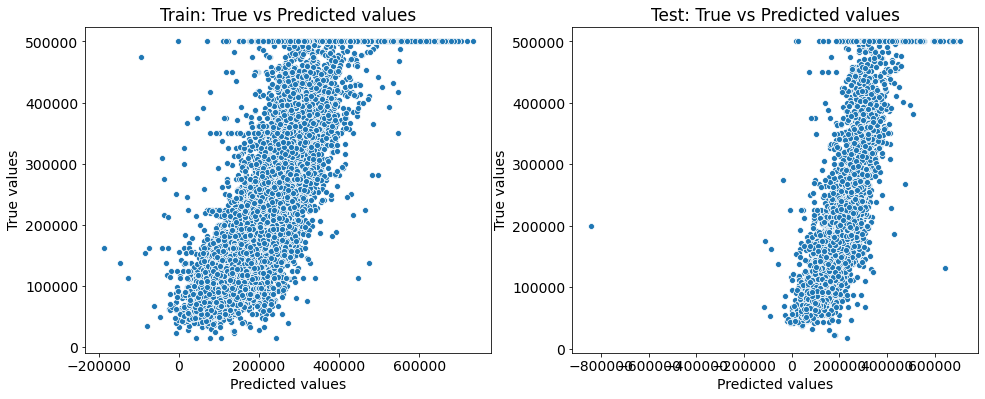

In [30]:
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
y_test_preds = lr_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

**Перекрестная проверка (Cross Validation)**

![](kFold.jpeg)

In [31]:
X = pd.concat([X_train, X_test])
y = np.concatenate((y_train, y_test))
X.shape, y.shape

((20635, 25), (20635, 1))

In [32]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

cv_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='r2', n_jobs=-1)
cv_scores

array([0.6596033 , 0.65060854, 0.65472809, 0.65340146, 0.65407518])

In [33]:
print('R2 для линейной регрессии = ', round(cv_scores.mean(), 3))

R2 для линейной регрессии =  0.654


**Random Forest - Случайный лес**

![](tree_for_price2.png)

![](bin_class2.jpg)

In [34]:
X = df[feature_names]
y = df[target_name].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15476, 16) (15476, 1)
(5159, 16) (5159, 1)


In [35]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Train:	R2 = 0.973	MAE = 12437.193
Test:	R2 = 0.796	MAE = 33492.231


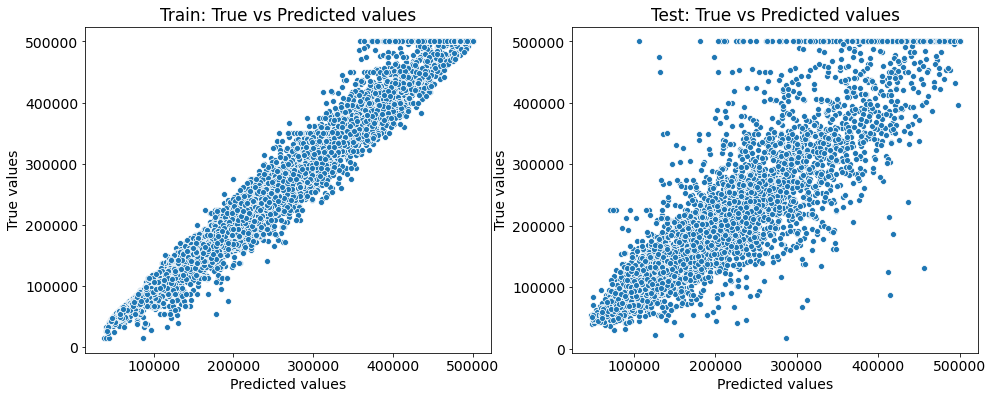

In [36]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [37]:
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2', n_jobs=-1)
print('R2 для случайного леса = ', round(cv_scores.mean(), 3))

R2 для случайного леса =  0.808


**Gradient Boosting - Градиентный **

![](gradient_desent.png)

In [38]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Train:	R2 = 0.807	MAE = 35491.25
Test:	R2 = 0.771	MAE = 37490.743


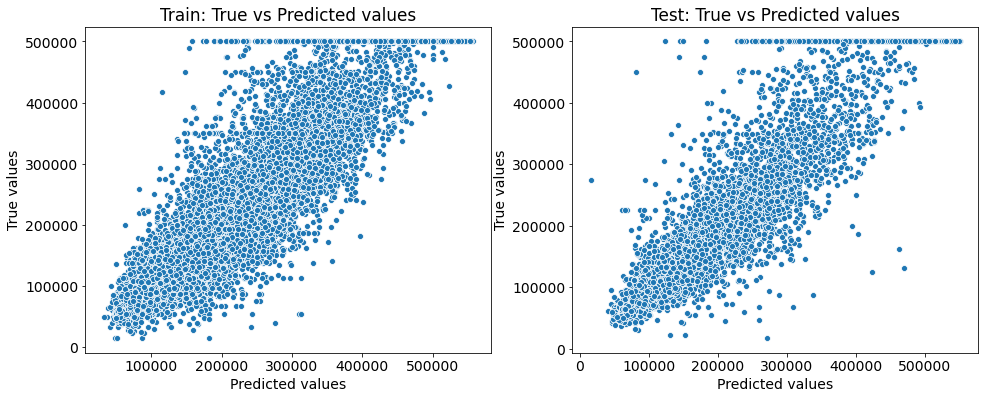

In [39]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

### Настройка и оценка финальной модели

**Подбор гиперпараметров**

In [40]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Некоторые гиперпараметры модели:

* n_estimators - количество деревьев  
* max_depth – максимальная глубина дерева  
* max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве   
* min_samples_leaf – минимальное число объектов в листе

In [41]:
params = {'n_estimators':[100, 200, 400], 
          'max_depth':[5, 7, 9]}

gs = GridSearchCV(gb_model, params, scoring='r2', 
                  cv=KFold(n_splits=3, random_state=42, shuffle=True), 
                  n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                             

In [42]:
gs.best_params_

{'max_depth': 7, 'n_estimators': 400}

In [43]:
gs.best_score_

0.8391519517025275

**Обучение и оценка модели**

In [44]:
final_model = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=42)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Train:	R2 = 0.981	MAE = 11898.9
Test:	R2 = 0.831	MAE = 30060.767


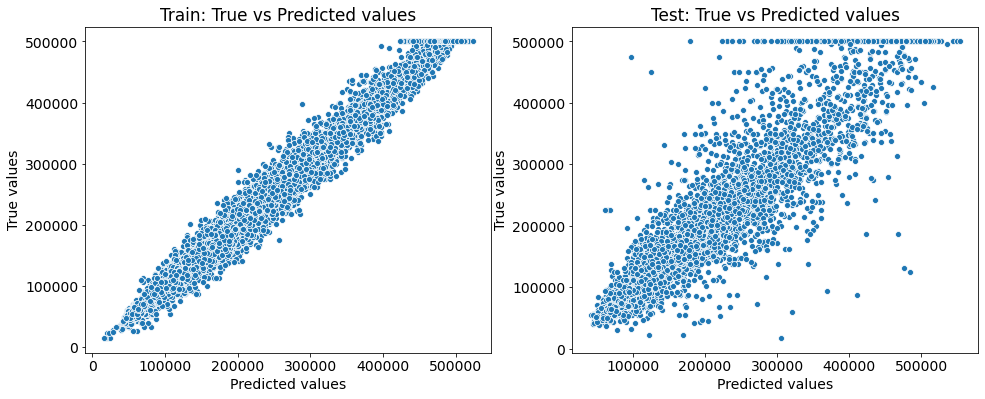

In [45]:
y_train_preds = final_model.predict(X_train)
y_test_preds = final_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

**Важность признаков**

In [46]:
feature_importances = pd.DataFrame(zip(*[X_train.columns], final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
7,median_income,0.487
9,INLAND,0.136
14,persons_per_household,0.112
0,longitude,0.074
1,latitude,0.067
2,housing_median_age,0.038
12,rooms_per_household,0.024
13,bedrooms_per_household,0.019
15,income_per_person,0.010
4,total_bedrooms,0.008


### Сохранение модели

**Scaler**

In [47]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

**Model**

In [48]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)